In [1]:
import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import os

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
coords = ["x", "y", "z"]
keypoint_names = []
keypoint_names.append("frame")
keypoint_names.append("class")

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("R"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("L"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.PoseLandmark:
    for coord in coords:
        keypoint_names.append(str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
    if count == 15:
        break

In [4]:
df = pd.DataFrame([], columns= keypoint_names)
df

,frame,class,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


In [5]:
hand_keypoints = 21 * 3
pose_keypoints = 15 * 3

In [6]:
hand_empty_keypoints = np.empty(hand_keypoints)
pose_empty_keypoints = np.empty(pose_keypoints)
hand_empty_keypoints[:] = 0.0 #np.nan
pose_empty_keypoints[:] = 0.0 #np.nan
hand_empty_keypoints = list(hand_empty_keypoints)
pose_empty_keypoints = list(pose_empty_keypoints)

In [7]:
# leer videos
#path = "Train_Dataset/"
path  ='gestures/'
words = [words for words in os.listdir(path) if os.path.isdir(os.path.join(path, words))]
# Todos los videos se cambian a  resolucion (600x900), para su mejor deteccion de puntos.
HEIGHT = 600
WIDTH  = 900
for word in words:
    for video in os.listdir(os.path.join(path, word)):
        # Direccion donde se encuentran los videos
        frame_number = 0
        video_path = os.path.join(os.path.join(path, word), video)
        # Captura de videos
        cap = cv2.VideoCapture(video_path)
        # Inizializar modelo holistico
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            while cap.isOpened():
                # Leer sequencia
                ret, frame = cap.read()
                if ret == True:
                    frame_number += 1
                    # Redimensionar sequencia
                    frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
                    # Cambiar  color de BGR a RGB
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame.flags.writeable = False
                    # Deteccion puntos de referencia
                    results = holistic.process(frame)
                    try:
                        # Añadir coordenadas a la lista
                        row = []
                        # El nombre de las palabras es añadida a la lista
                        row.append(frame_number)
                        row.append(word)
                        
                        ## Detectar puntos mano derecha (rhand)
                        if results.right_hand_landmarks:
                            for landmark in results.right_hand_landmarks.landmark:
                                row.append(landmark.x)
                                row.append(landmark.y)
                                row.append(landmark.z)    
                        else:
                            row.extend(hand_empty_keypoints)
                                
                        ## Detectar puntos mano iquierda (lhand)
                        if results.left_hand_landmarks:
                            for landmark in results.left_hand_landmarks.landmark:
                                row.append(landmark.x)
                                row.append(landmark.y)
                                row.append(landmark.z)    
                        else:
                            row.extend(hand_empty_keypoints)
                        
                        ## Detectar puntos cuerpo (pose)
                        if results.pose_landmarks:
                            count = 0
                            for landmark in results.pose_landmarks.landmark:
                                row.append(landmark.x)
                                row.append(landmark.y)
                                row.append(landmark.z)
                                count += 1
                                if count == 15:
                                    break    
                        else:
                            row.extend(pose_empty_keypoints)
                        df.loc[len(df)] = row
                    except Exception as e:
                        print(e)
                else:
                    break
            cap.release()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [8]:
df

,frame,class,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
0,1,dolor_cabeza,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.211010,0.353910,0.568139,-0.282032,0.638152,0.891224,-0.160888,0.302279,0.876435,-0.299072
1,2,dolor_cabeza,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.211372,0.354033,0.566902,-0.283135,0.638752,0.891936,-0.180523,0.300560,0.872955,-0.323248
2,3,dolor_cabeza,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.237768,0.354165,0.565567,-0.286383,0.640068,0.891845,-0.212271,0.297784,0.870569,-0.353186
3,4,dolor_cabeza,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.234776,0.354243,0.563836,-0.281456,0.640782,0.889232,-0.203331,0.296641,0.868040,-0.347092
4,5,dolor_cabeza,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.233119,0.355603,0.562580,-0.278273,0.642236,0.889277,-0.200709,0.295280,0.864075,-0.340596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,55,medico,0.435326,0.595708,1.510067e-07,0.458309,0.602966,-0.008170,0.480440,0.601435,...,-0.138371,0.373626,0.537151,-0.064596,0.707040,0.762000,-0.523723,0.281767,0.822057,-0.463172
801,56,medico,0.436537,0.603201,1.713248e-07,0.460213,0.610264,-0.006920,0.483547,0.609620,...,-0.146075,0.373624,0.537161,-0.079732,0.706791,0.764025,-0.523887,0.281815,0.822058,-0.474391
802,57,medico,0.429104,0.618852,1.996070e-07,0.452294,0.628079,-0.007734,0.476933,0.626073,...,-0.194798,0.373698,0.537138,-0.107809,0.706871,0.769039,-0.527252,0.281821,0.823858,-0.476739
803,58,medico,0.418961,0.633098,1.760652e-07,0.446354,0.632042,-0.002356,0.479844,0.617506,...,-0.185820,0.373623,0.537124,-0.110877,0.710242,0.785417,-0.491684,0.281809,0.828190,-0.465887


In [9]:
df['class'].unique()

array(['dolor_cabeza', 'hospital', 'ponerse_mascarilla', 'dolor_garganta',
       'dificultad_respirar', 'coronavirus', 'evitar_contacto',
       'quedan_en_casa', 'fiebre', 'medico'], dtype=object)

In [10]:
df.to_csv("data.csv", index= False)

<AxesSubplot: >

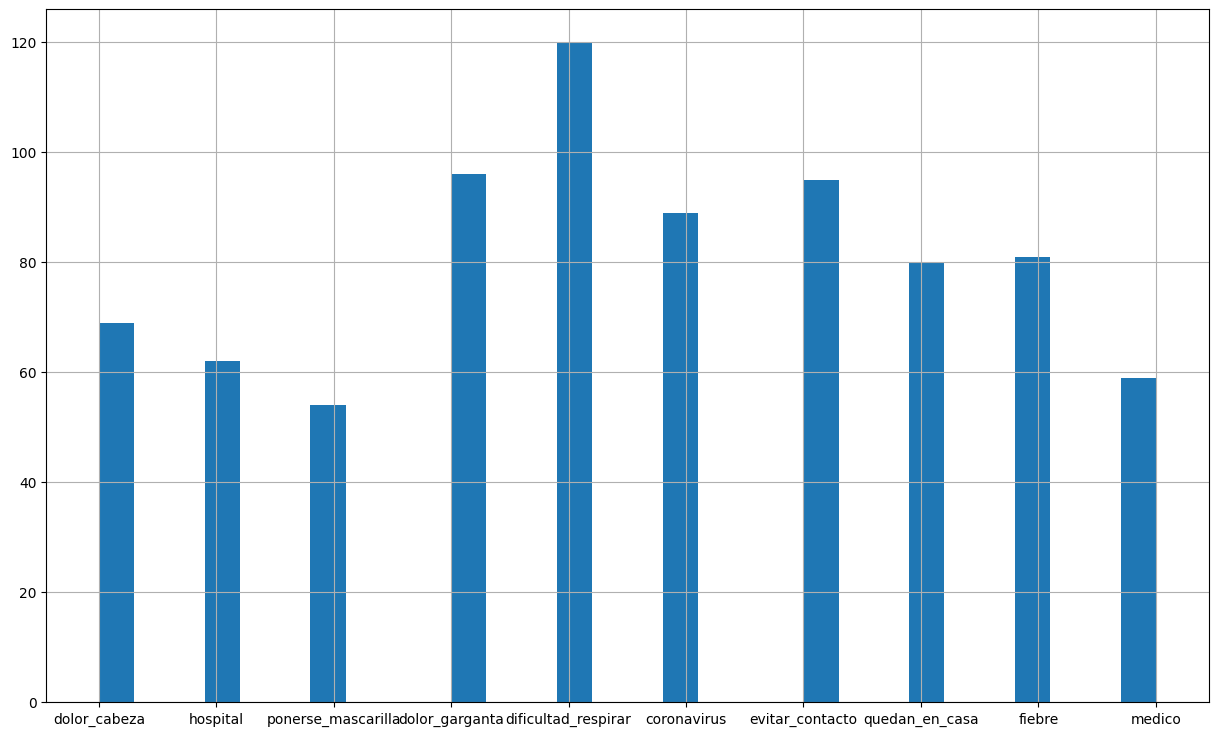

In [11]:
plt.figure(figsize=(15,9))
df['class'].hist(bins=30)